In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/MyDrive/Sheep Face classification/

/gdrive/MyDrive/Sheep Face classification


In [4]:
ls

 Marino/   Suffolk/  'White Suffolk'/


In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [6]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=40
CHANNELS=3

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/MyDrive/Sheep Face classification",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1260 files belonging to 3 classes.


In [10]:
class_names = dataset.class_names
class_names

['Marino', 'Suffolk', 'White Suffolk']

In [11]:
len(dataset)

21

In [12]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[181.       171.       159.      ]
  [172.71875  162.71875  150.71875 ]
  [161.60938  151.60938  139.60938 ]
  ...
  [ 61.023438  48.046875  57.070312]
  [ 61.585938  46.828125  56.414062]
  [ 62.        46.        56.      ]]

 [[192.21094  182.21094  170.21094 ]
  [184.16179  174.16179  162.16179 ]
  [173.32831  163.32831  151.32831 ]
  ...
  [ 62.065704  47.460052  57.004623]
  [ 63.035477  47.909805  56.742508]
  [ 63.68164   48.242188  56.560547]]

 [[202.33789  192.33789  180.33789 ]
  [194.4707   184.4707   172.4707  ]
  [183.87233  173.87233  161.87233 ]
  ...
  [ 63.70436   47.535156  56.42424 ]
  [ 64.817825  48.9794    56.621628]
  [ 65.53516   50.        56.73242 ]]

 ...

 [[151.80273  140.80273  122.802734]
  [145.20685  134.20685  116.20685 ]
  [135.29933  124.29933  106.29933 ]
  ...
  [ 38.773026  30.773026  28.773026]
  [ 38.73242   30.732422  28.732422]
  [ 38.73242   30.732422  28.732422]]

 [[149.24219  138.24219  120.24219 ]
  [139.6

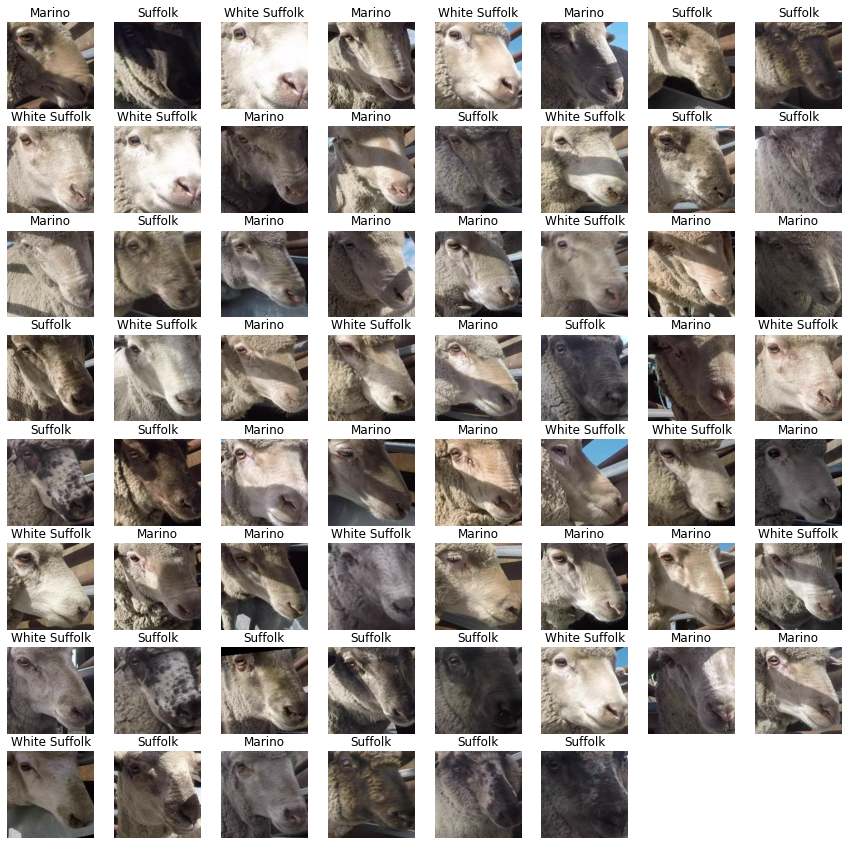

In [13]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [17]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [18]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

In [21]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/40
16/16 [==============================] - 181s 5s/step - loss: 1.5259 - accuracy: 0.3547 - val_loss: 1.1525 - val_accuracy: 0.3537
Epoch 2/40
16/16 [==============================] - 71s 4s/step - loss: 1.0800 - accuracy: 0.4347 - val_loss: 1.0347 - val_accuracy: 0.3902
Epoch 3/40
16/16 [==============================] - 72s 4s/step - loss: 0.9523 - accuracy: 0.5126 - val_loss: 0.8664 - val_accuracy: 0.5854
Epoch 4/40
16/16 [==============================] - 72s 4s/step - loss: 0.7721 - accuracy: 0.6337 - val_loss: 0.6747 - val_accuracy: 0.6341
Epoch 5/40
16/16 [==============================] - 72s 4s/step - loss: 0.6392 - accuracy: 0.6884 - val_loss: 0.6141 - val_accuracy: 0.7073
Epoch 6/40
16/16 [==============================] - 72s 4s/step - loss: 0.5451 - accuracy: 0.7453 - val_loss: 0.4868 - val_accuracy: 0.8537
Epoch 7/40
16/16 [==============================] - 72s 4s/step - loss: 0.5478 - accuracy: 0.7716 - val_loss: 0.6090 - val_accuracy: 0.7317
Epoch 8/40
16/16 [=

In [22]:
model.evaluate(test_ds)

3/3 [==============================] - 6s 1s/step - loss: 0.0741 - accuracy: 0.9892


[0.0740615501999855, 0.9892473220825195]

In [23]:
acc = history.history['accuracy']
loss = history.history['loss']

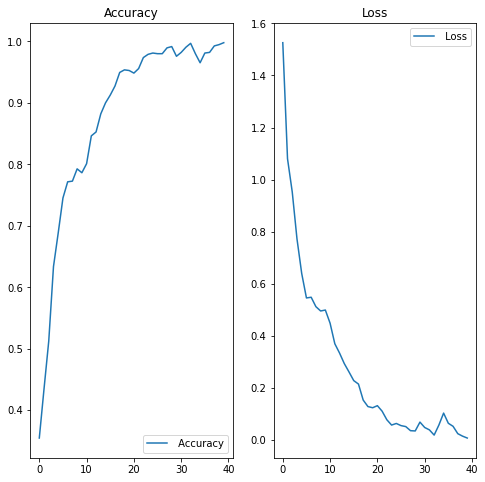

In [24]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

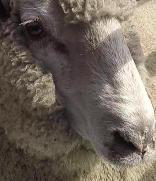

In [26]:
image_path = "/gdrive/My Drive/crop015777WF4.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [27]:
pred = model.predict(scaled_img)

In [28]:
output = class_names[np.argmax(pred)]

In [29]:
output

'White Suffolk'

In [30]:
model.save("Sheep Face classification.h5")